# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Imports
from sklearn.metrics import plot_confusion_matrix,matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#scoring function for all models
#import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef


In [2]:
useful_data=pd.read_csv("useful_data.csv")

In [3]:
#select necessry columns
def transform_operations(df):
    df_new = df[['home_ownership', 'annual_income', 'purpose', 'term', 'current_loan_amount', 'credit_score', 'credit_default' ]]
    return df_new

useful_data = transform_operations(useful_data)

# Transform data

In [4]:
#Get dummies for categorical variables
with_dummies=pd.get_dummies(useful_data,columns=["home_ownership","purpose","term"],drop_first=True)
with_dummies.columns

Index(['annual_income', 'current_loan_amount', 'credit_score',
       'credit_default', 'home_ownership_Home Mortgage',
       'home_ownership_Own Home', 'home_ownership_Rent', 'purpose_buy a car',
       'purpose_buy house', 'purpose_debt consolidation',
       'purpose_educational expenses', 'purpose_home improvements',
       'purpose_major purchase', 'purpose_medical bills', 'purpose_moving',
       'purpose_other', 'purpose_small business', 'purpose_take a trip',
       'purpose_vacation', 'purpose_wedding', 'term_Short Term'],
      dtype='object')

In [5]:
#Split X and y
X=with_dummies.drop(["credit_default"],axis=1)
y=with_dummies["credit_default"]
print(X.shape,y.shape)

(4673, 20) (4673,)


In [6]:
#Split train and test
from sklearn.model_selection import train_test_split
def get_data_split(x, y, test_size = 0.2):
    # split arrays or matrices into random train and test subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,  stratify=y)
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data_split(X, y)

In [7]:
# define oversampling strategy
# To handle imbalance in dataset
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, y_train = oversample.fit_resample(X_train, y_train)

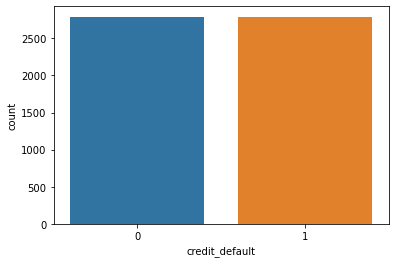

In [8]:
#to confirm both classes have same number of values
sns.countplot(x=y_train)
plt.show()

# Fit the pipeline with logistic regression

In [9]:
#Scoring
mcc_scorer=make_scorer(matthews_corrcoef)

In [10]:
## Use pipeline to scale and fit
pipe = Pipeline([('scaler', StandardScaler()), ('Log_reg', LogisticRegression(solver= 'lbfgs', penalty= 'l2', fit_intercept= True, C= 1.0))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Log_reg', LogisticRegression())])

MCC score is 0.187


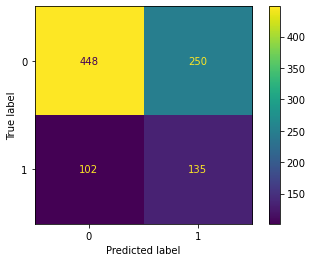

In [11]:
#Check performance
y_pipe_pred=pipe.predict(X_test)
print("MCC score is",round(matthews_corrcoef(y_test,y_pipe_pred),3))
plot_confusion_matrix(pipe,X_test,y_test)
plt.show()

# Predicting probability of default

In [12]:
sample_input=X_test.iloc[1]
sample_output=y_test.iloc[1]
print("Sample input is: \n",sample_input)
print("Sample actual output is: ",sample_output)

Sample input is: 
 annual_income                   1567196
current_loan_amount              572616
credit_score                        740
home_ownership_Home Mortgage          1
home_ownership_Own Home               0
home_ownership_Rent                   0
purpose_buy a car                     0
purpose_buy house                     0
purpose_debt consolidation            1
purpose_educational expenses          0
purpose_home improvements             0
purpose_major purchase                0
purpose_medical bills                 0
purpose_moving                        0
purpose_other                         0
purpose_small business                0
purpose_take a trip                   0
purpose_vacation                      0
purpose_wedding                       0
term_Short Term                       1
Name: 1073, dtype: int64
Sample actual output is:  0


In [13]:
# Predicting probability of default
yhat = pipe.predict_proba([sample_input.values])
yhat = yhat[:, 1]
sample_prediction=pipe.predict([sample_input.values])
print("Predicted probability for input is:",yhat)
print("Predicted outcome is",sample_prediction)

Predicted probability for input is: [0.37292431]
Predicted outcome is [0]
